In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv(
    "/content/drive/MyDrive/cs3244/dataset/train-balanced.csv.bz2",
    compression="bz2",
    sep="\t",
    header=None
)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = [
    "label", "text", "author", "subreddit",
    "upvotes", "downvotes", "score",
    "date", "timestamp", "comment"
]

# 1. Basic info
print(df.info())
print(df.head())
print(df.describe(include="all").transpose())


# 2. Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125678 entries, 0 to 1125677
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   label      1125678 non-null  int64 
 1   text       1125667 non-null  object
 2   author     1125678 non-null  object
 3   subreddit  1125678 non-null  object
 4   upvotes    1125678 non-null  int64 
 5   downvotes  1125678 non-null  int64 
 6   score      1125678 non-null  int64 
 7   date       1125678 non-null  object
 8   timestamp  1125678 non-null  int64 
 9   comment    1125675 non-null  object
dtypes: int64(5), object(5)
memory usage: 85.9+ MB
None
   label                                               text        author  \
0      0                                   Dang dog, thanks    Mattys1174   
1      0  to summon the powers of the flying spaghetti m...    yugiohhero   
2      0       i did that 3rd last 1 by accident last night    yugiohhero   
3      0  He's insane, used him

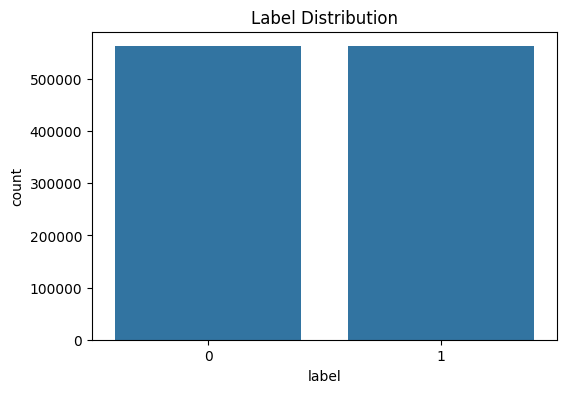

In [ ]:
# 3. Label distribution
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df)
plt.title("Label Distribution")
plt.show()


/tmp/ipython-input-1233207891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subreddits.values, y=top_subreddits.index, palette="viridis")


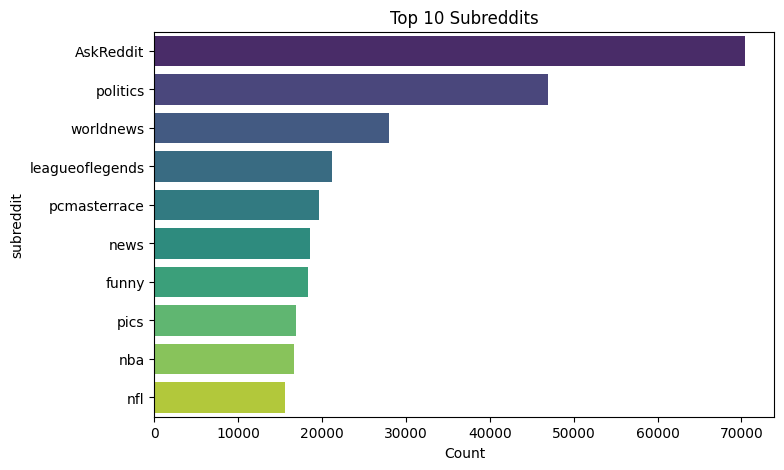

In [ ]:
# 4. Top subreddits
top_subreddits = df["subreddit"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_subreddits.values, y=top_subreddits.index, palette="viridis")
plt.title("Top 10 Subreddits")
plt.xlabel("Count")
plt.show()

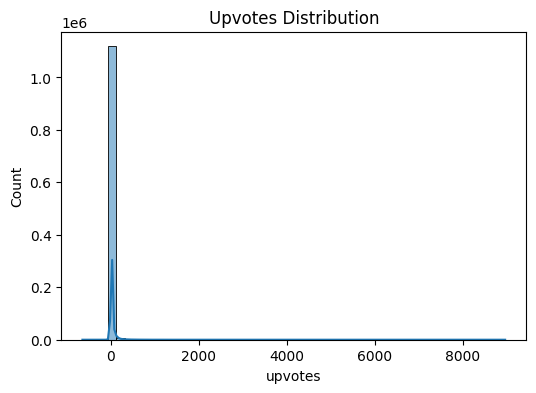

In [ ]:
# 5. Upvotes distribution
plt.figure(figsize=(6,4))
sns.histplot(df["upvotes"], bins=50, kde=True)
plt.title("Upvotes Distribution")
plt.show()


/tmp/ipython-input-3906433015.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="label", y="upvotes", data=df, estimator="mean", ci=None)


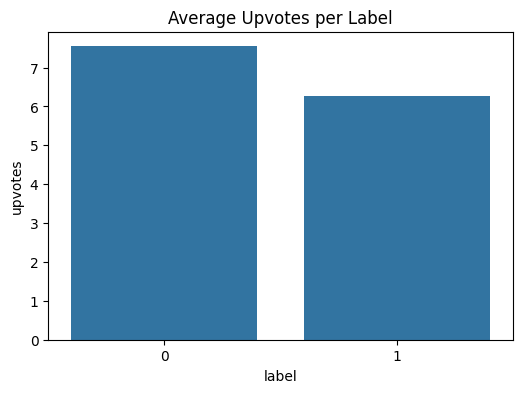

In [ ]:
# 6. Average upvotes by label
plt.figure(figsize=(6,4))
sns.barplot(x="label", y="upvotes", data=df, estimator="mean", ci=None)
plt.title("Average Upvotes per Label")
plt.show()


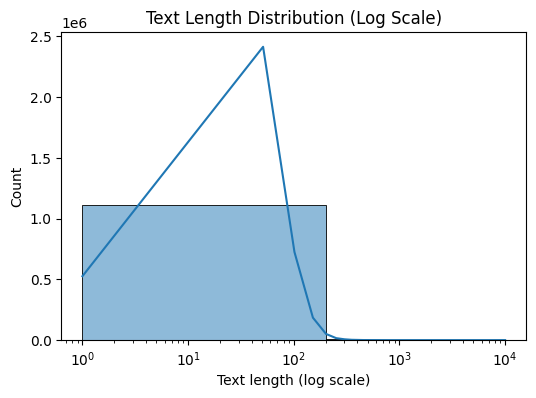

label
0    56.903159
1    56.751814
Name: text_len, dtype: float64


In [7]:
# 7. Text length analysis
df["text_len"] = df["text"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df["text_len"], bins=50, kde=True)
plt.xscale("log")
plt.title("Text Length Distribution (Log Scale)")
plt.xlabel("Text length (log scale)")
plt.show()


# Average text length by label
print(df.groupby("label")["text_len"].mean())